#Importing libraries required

In [2]:
#Importing libraries required
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
from scipy.stats import norm
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind_from_stats
from scipy.stats import ttest_1samp
import scipy.linalg as la
import numpy.linalg as nla


from scipy import stats

#Data exploration

In [55]:
#1. Load the dataset and perform initial data exploration.
df=pd.read_csv("price.csv")
pd.options.display.float_format = '{:.2f}'.format
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.00,3,1.50,1340,7912,1.50,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.00,5,2.50,3650,9050,2.00,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.00,3,2.00,1930,11947,1.00,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.00,3,2.25,2000,8030,1.00,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.00,4,2.50,1940,10500,1.00,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166.67,3,1.75,1510,6360,1.00,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.33,3,2.50,1460,7573,2.00,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.17,3,2.50,3010,7014,2.00,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.00,4,2.00,2090,6630,1.00,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [4]:
df.shape


(4600, 18)

In [5]:
df.head(20)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [6]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [7]:
#Identify the types of variables present and categorize them.
datatype=df.dtypes
datatype

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

3. Obtain insights about the data.

In [8]:
filt = df[(df['yr_built'] >= df['yr_renovated']) & (df['yr_renovated'] > 0)]
(filt[['yr_built', 'yr_renovated']])

,yr_built,yr_renovated
31,2004,2003
60,2012,1912
61,2013,1923
64,2012,1912
68,2004,2003
...,...,...
4434,2012,1912
4441,2013,1923
4481,2013,1923
4504,2004,2003


In [8]:

column = 'city'
unique_cities = df[column].unique()
city_counts = {}
for city in unique_cities:
    count = df[df[column] == city][column].count()
    city_counts[city] = count
for city, count in city_counts.items():
    print(f"Count of non-null values in '{column}' for '{city}': {count}")


Count of non-null values in 'city' for 'Shoreline': 123
Count of non-null values in 'city' for 'Seattle': 1573
Count of non-null values in 'city' for 'Kent': 185
Count of non-null values in 'city' for 'Bellevue': 286
Count of non-null values in 'city' for 'Redmond': 235
Count of non-null values in 'city' for 'Maple Valley': 96
Count of non-null values in 'city' for 'North Bend': 50
Count of non-null values in 'city' for 'Lake Forest Park': 36
Count of non-null values in 'city' for 'Sammamish': 175
Count of non-null values in 'city' for 'Auburn': 176
Count of non-null values in 'city' for 'Des Moines': 58
Count of non-null values in 'city' for 'Bothell': 33
Count of non-null values in 'city' for 'Federal Way': 148
Count of non-null values in 'city' for 'Kirkland': 187
Count of non-null values in 'city' for 'Issaquah': 187
Count of non-null values in 'city' for 'Woodinville': 115
Count of non-null values in 'city' for 'Normandy Park': 18
Count of non-null values in 'city' for 'Fall City'

In [9]:

zero_price_count = df['price'].value_counts().get(0, 0)
total_house_count = df['price'].count()
zero_price_percentage = (zero_price_count / total_house_count) * 100

print("Count of houses with a price of $0:", zero_price_count)
print("Percentage of houses with a price of $0:", zero_price_percentage)


Count of houses with a price of $0: 49
Percentage of houses with a price of $0: 1.065217391304348


/Users/shitgupt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/07/qch9szx51kdgzhzp77njqrqw001f2_/T/ipykernel_61151/4181542502.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


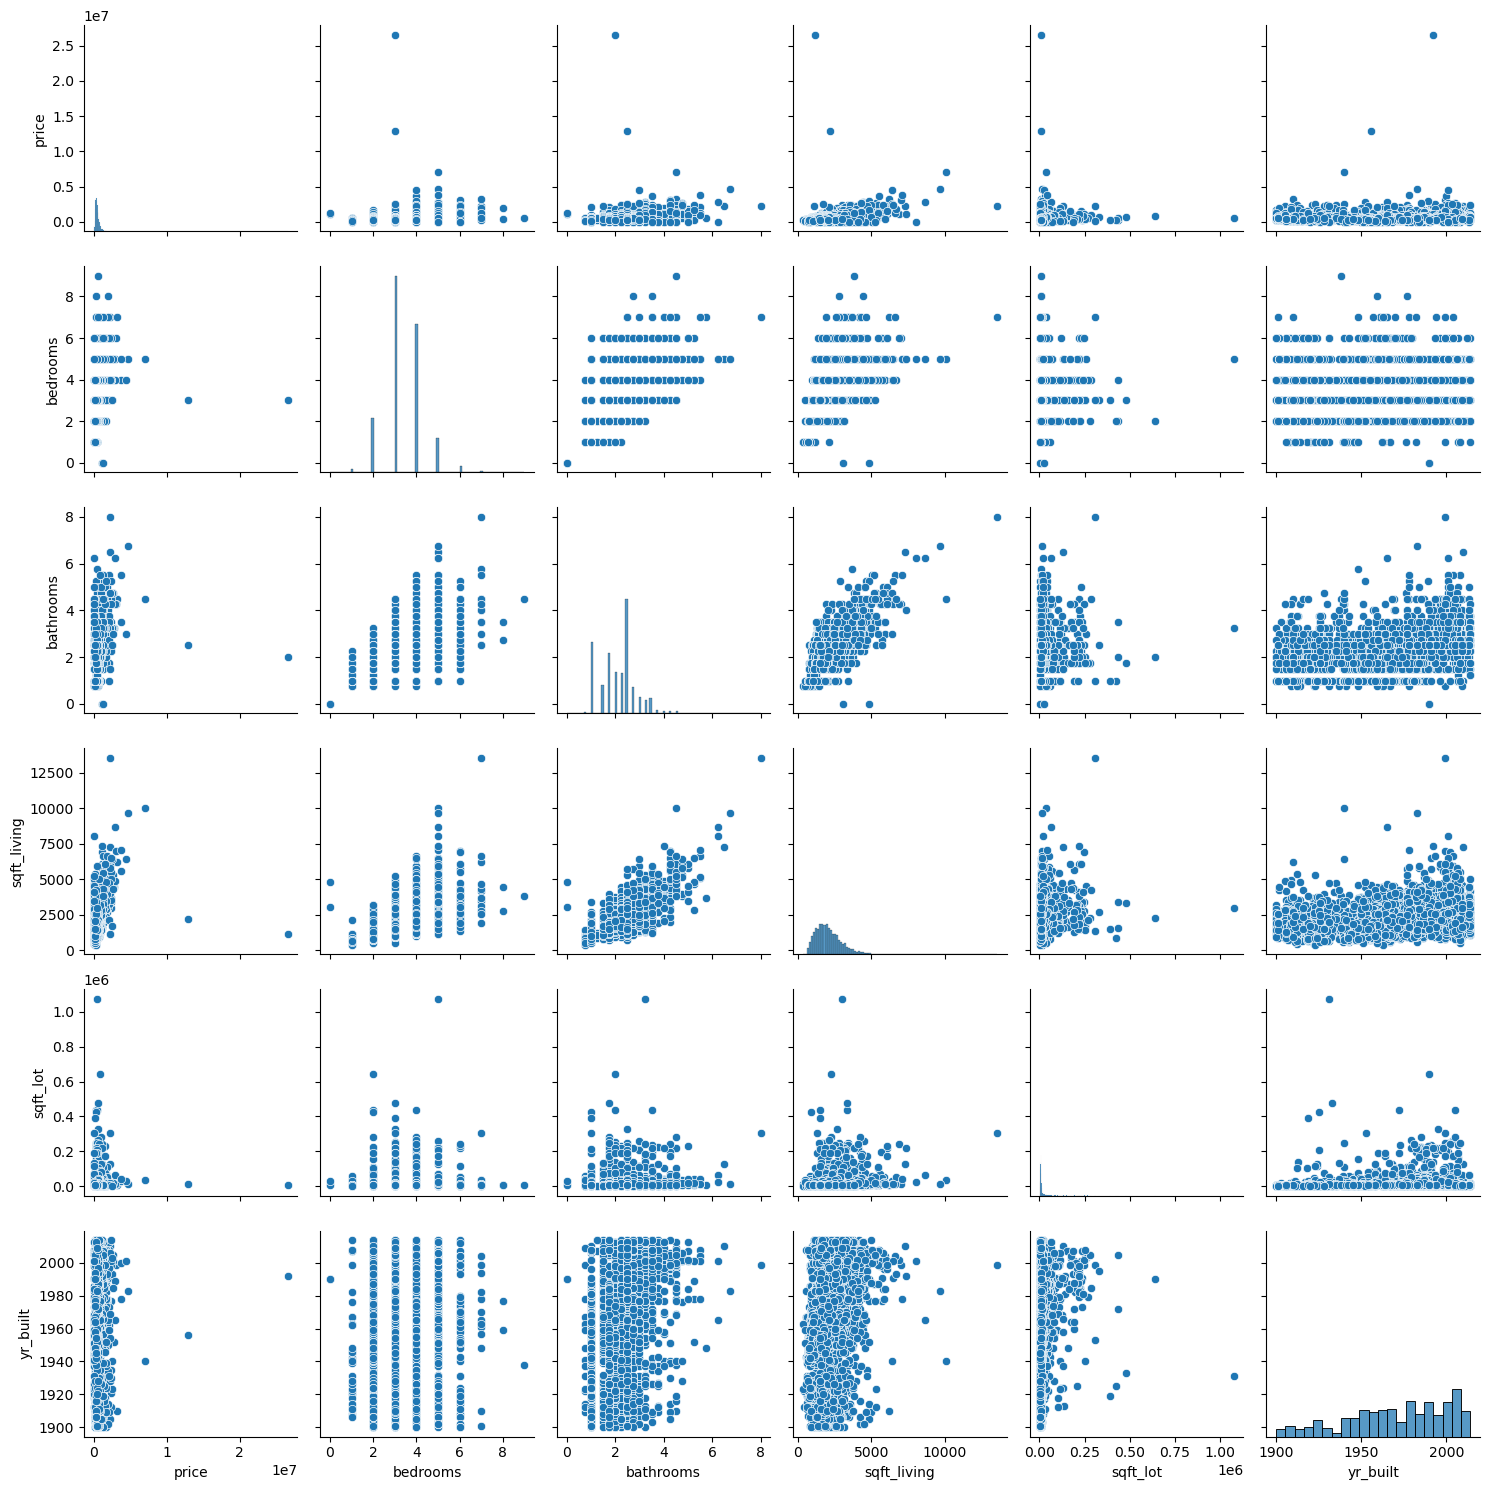

In [11]:

sns.pairplot(df, vars=["price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot","yr_built"])
plt.tight_layout()
plt.show()

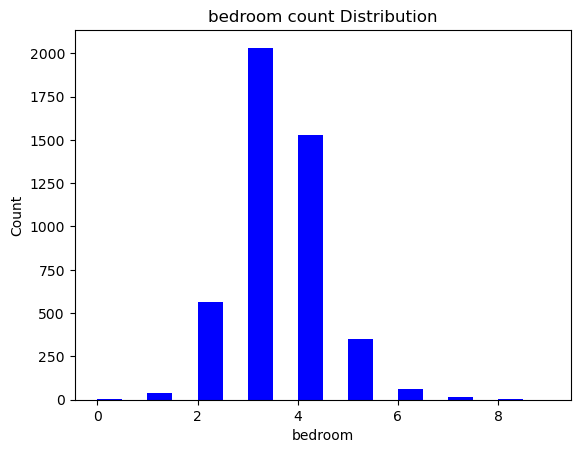

In [32]:

bed = df['bedrooms']
bins=18
plt.hist(bed, bins=bins, alpha=1, color='blue', rwidth=2)
plt.xlabel('bedroom')
plt.ylabel('Count')
plt.title('bedroom count Distribution')
plt.show()


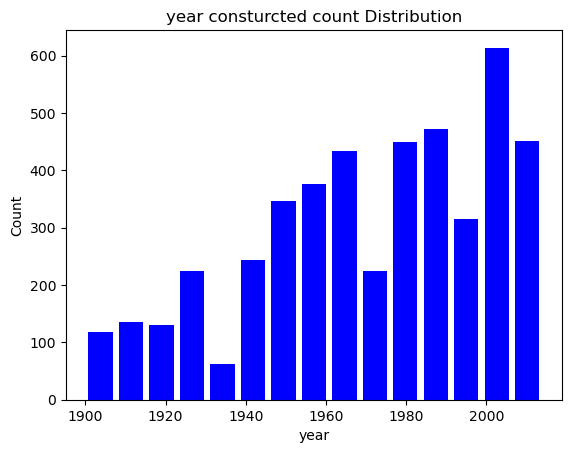

In [33]:

bed = df['yr_built']
bins = 15
plt.hist(bed, bins=bins, alpha=1, color='blue', rwidth=0.8)
plt.xlabel('year')
plt.ylabel('Count')
plt.title('year constructed count Distribution')
plt.show()

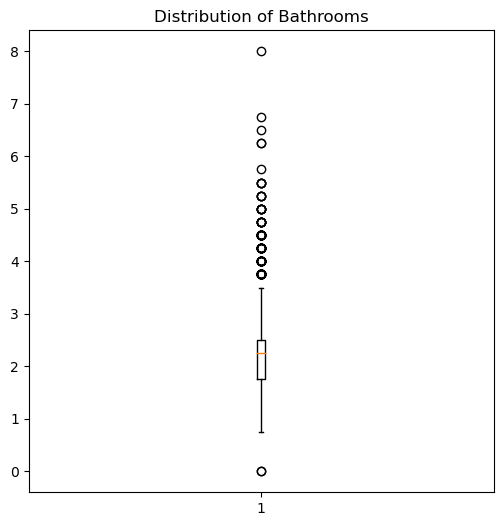

In [37]:
ba=df['bathrooms']
plt.figure(figsize=(6, 6))
plt.boxplot(ba)
plt.title('Distribution of Bathrooms')
plt.axis('equal') 
plt.show()

0       313000.00
1      2384000.00
2       342000.00
3       420000.00
4       550000.00
          ...    
4595    308166.67
4596    534333.33
4597    416904.17
4598    203400.00
4599    220600.00
Name: price, Length: 4600, dtype: float64


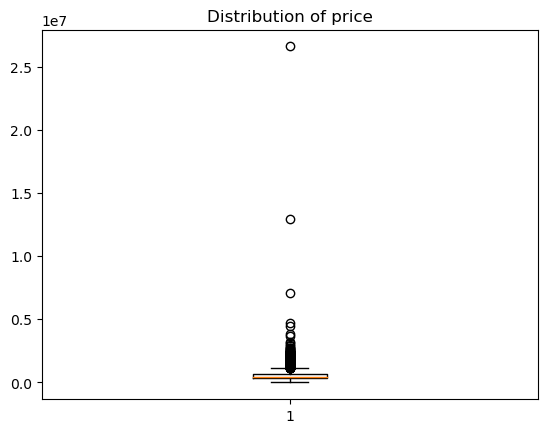

In [56]:
ba=df['price']
print(ba)
#plt.figure(figsize=(8, 7))
plt.boxplot(ba)
plt.title('Distribution of price') 
plt.show()

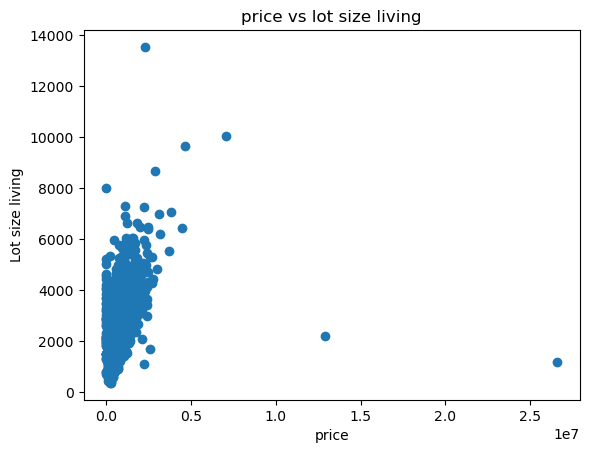

In [15]:
x=(df['price'])
y=(df['sqft_living'])


plt.xlabel('price')
plt.ylabel('Lot size living')
plt.title('price vs lot size living')
plt.scatter(x,y)

4. Find the number of missing values for each column.

In [16]:
null_count = df.isnull().sum().sum()
null_count

0

In [17]:
na_count=df.isna().sum().sum()
na_count

0

5. Calculate summary statistics for numerical columns, such as mean, median, standard
deviation, etc.

In [60]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00
mean,551962.99,3.40,2.16,2139.35,14852.52,1.51,0.01,0.24,3.45,1827.27,312.08,1970.79,808.61
std,563834.70,0.91,0.78,963.21,35884.44,0.54,0.08,0.78,0.68,862.17,464.14,29.73,979.41
min,0.00,0.00,0.00,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00
25%,322875.00,3.00,1.75,1460.00,5000.75,1.00,0.00,0.00,3.00,1190.00,0.00,1951.00,0.00
50%,460943.46,3.00,2.25,1980.00,7683.00,1.50,0.00,0.00,3.00,1590.00,0.00,1976.00,0.00
75%,654962.50,4.00,2.50,2620.00,11001.25,2.00,0.00,0.00,4.00,2300.00,610.00,1997.00,1999.00
max,26590000.00,9.00,8.00,13540.00,1074218.00,3.50,1.00,4.00,5.00,9410.00,4820.00,2014.00,2014.00


In [19]:
df['price'].mode

<bound method Series.mode of 0        313000.00
1       2384000.00
2        342000.00
3        420000.00
4        550000.00
           ...    
4595     308166.67
4596     534333.33
4597     416904.17
4598     203400.00
4599     220600.00
Name: price, Length: 4600, dtype: float64>

In [20]:
df1=df['price']
df1.mean()


551962.9884695652

In [21]:

x=st.stdev(df1)
x

563834.7025446305

6. Analyze the distribution of the numerical feature “price” using a distribution plot such as
a histogram.


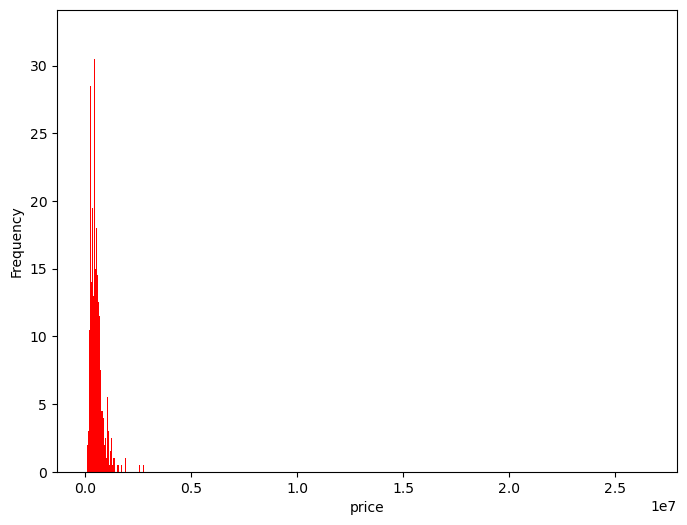

In [68]:

plt.figure(figsize=(8, 6))
x=(df['price'])
#plt.hist(x,color='red',bins=1000)
plt.hist(x, color='red', bins=5800, weights=np.full(len(x), 0.5))
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

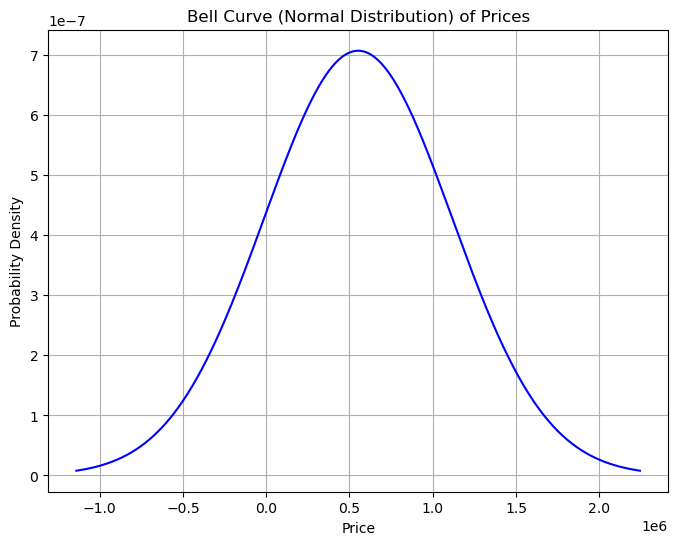

In [23]:
meanofprice = df['price'].mean()
stdofprice = df['price'].std()
x = np.linspace(meanofprice - 3 * stdofprice, meanofprice + 3 * stdofprice, 1000)

y = (1 / (stdofprice * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - meanofprice) / stdofprice)**2)
plt.figure(figsize=(8, 6))

plt.plot(x, y, color='blue')
plt.title('Bell Curve (Normal Distribution) of Prices')
plt.xlabel('Price')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

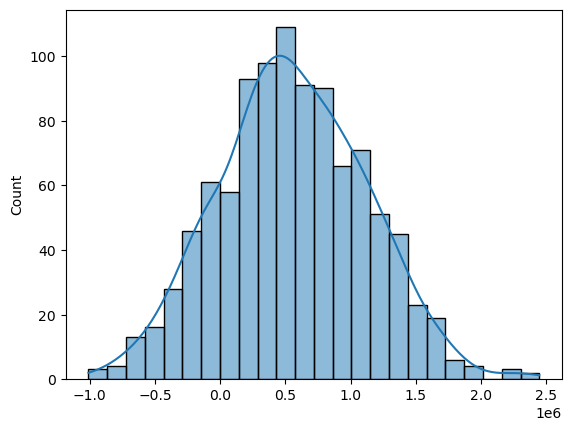

In [24]:

mean = df1.mean()
sd = st.stdev(df1)

data = np.random.normal(loc=mean, scale=sd, size=1000)

sns.histplot(data, kde=True)  
plt.show()


8. Use the Shapiro-Wilk test to do a normality test and check if the “price” feature follows
the normal distribution (if the p-value is greater than 0.05 then the feature follows the
Normal distribution)

In [25]:

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(df1)
alpha = 0.05

if p_value > alpha:
    print("The 'price' feature follows a normal distribution (fail to reject null hypothesis)")
else:
    print("The 'price' feature does not follow a normal distribution (reject null hypothesis)")


The 'price' feature does not follow a normal distribution (reject null hypothesis)


9. Consider the Hypothesis "The year built has a significant impact on sale price.”. Do a
hypothesis test using a t-test: split into two groups: properties built before 1990 and those
built-in or after 1990. (alpha/confidence interval= 95%)


In [26]:
dfbefore=df[df['yr_built']<1990]
dfafter=df[df['yr_built']>1990]
dfafter


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
17,5/2/2014 0:00,367500.00,4,3.00,3110,7231,2.0,0,0,3,3110,0,1997,0,11224 SE 306th Pl,Auburn,WA 98092,USA
22,5/2/2014 0:00,626000.00,3,2.25,1750,1572,2.5,0,0,3,1470,280,2005,0,3140 Franklin Ave E,Seattle,WA 98102,USA
23,5/2/2014 0:00,612500.00,4,2.50,2730,12261,2.0,0,0,3,2730,0,1991,0,10212 NE 156th Pl,Bothell,WA 98011,USA
31,5/2/2014 0:00,499950.00,4,2.50,2860,3345,2.0,0,0,3,2190,670,2004,2003,20120 137th Ave NE,Woodinville,WA 98072,USA
33,5/2/2014 0:00,625000.00,4,2.50,2820,8408,2.0,0,0,3,2820,0,2014,0,17052 4th Ave NE,Shoreline,WA 98155,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4590,7/8/2014 0:00,380680.56,4,2.50,2620,8331,2.0,0,0,3,2620,0,1991,0,13602 SE 186th Pl,Renton,WA 98058,USA
4592,7/8/2014 0:00,252980.00,4,2.50,2530,8169,2.0,0,0,3,2530,0,1993,0,37654 18th Pl S,Federal Way,WA 98003,USA
4593,7/8/2014 0:00,289373.31,3,2.50,2538,4600,2.0,0,0,3,2538,0,2013,1923,5703 Charlotte Ave SE,Auburn,WA 98092,USA
4594,7/9/2014 0:00,210614.29,3,2.50,1610,7223,2.0,0,0,3,1610,0,1994,0,26306 127th Ave SE,Kent,WA 98030,USA


In [27]:
dfbefore

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000.00,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000.00,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,342000.00,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,420000.00,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,550000.00,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589,7/8/2014 0:00,182805.00,3,1.00,1040,8892,1.0,0,0,4,800,240,1958,1972,1028 SW 307th St,Federal Way,WA 98023,USA
4591,7/8/2014 0:00,396166.67,3,1.75,1880,5752,1.0,0,0,4,940,940,1945,0,3529 SW Webster St,Seattle,WA 98126,USA
4595,7/9/2014 0:00,308166.67,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,7/9/2014 0:00,534333.33,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA


In [28]:
t_statistic, p_value = ttest_ind(dfbefore['price'],dfafter['price'])

# Print the results
print("Independent t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results based on the p-value and alpha level
alpha = 0.05
if p_value > alpha:
    print("Cannot reject null hypothesis (H0 wins): The year built has a significant impact on sale price.")
else:
    print("Cannot accept H0 (H1 wins): The year built does not have a significant impact on sale price.")

Independent t-test results:
T-statistic: -5.148734399550817
P-value: 2.7337189187362644e-07
Cannot accept H0 (H1 wins): The year built does not have a significant impact on sale price.


10.Consider the Hypothesis "The year built has a significant impact on sale price.Do a
Hypothesis test using ANOVA: Assume that you have 3 groups: groupA has all houses
built in 1990, groupB has all houses that were built in 2000 and groupC has all houses
built in 2010 (alpha/confidence interval = 95%)


In [29]:
g1=df[df['yr_built']==1990]
g2=df[df['yr_built']==2000]
g3=df[df['yr_built']==2010]

In [30]:
f_statistic, p_value = stats.f_oneway(g1['price'],g2['price'],g3['price'])

# Interpret the results based on the p-value and alpha level
alpha = 0.05
print(p_value)
if p_value > alpha:
    print("Cannot reject null hypothesis (H0 wins): The year built has a significant impact on sale price.")
else:
    print("Cannot accept H0 (H1 wins): The year built does not have a significant impact on sale price.")

0.015547293596298594
Cannot accept H0 (H1 wins): The year built does not have a significant impact on sale price.


12. Calculate the covariance matrix of the numerical features present in the dataset.

In [69]:
#dropping waterfront
dfnum=df.select_dtypes(include='number')
del dfnum['waterfront']
covariancematrix = dfnum.cov()
print(covariancematrix)
covariancematrix.shape


                        price  bedrooms  bathrooms  sqft_living      sqft_lot  \
price         317909571796.42 102660.35  144557.39 233751158.98 1020775521.91   
bedrooms            102660.35      0.83       0.39       520.77       2244.44   
bathrooms           144557.39      0.39       0.61       574.63       3032.99   
sqft_living      233751158.98    520.77     574.63    927767.56    7277079.99   
sqft_lot        1020775521.91   2244.44    3032.99   7277079.99 1287692757.43   
floors               45969.21      0.09       0.21       178.80         72.43   
view                100288.56      0.08       0.13       233.18       2064.41   
condition            13331.96      0.02      -0.06       -40.98         13.56   
sqft_above       178683224.62    379.81     466.21    727839.77    6696770.89   
sqft_basement     55067934.36    140.96     108.41    199927.79     580309.10   
yr_built            366404.58      3.85      10.80      8241.28      54099.14   
yr_renovated     -15889609.8

(12, 12)

13. Create a heatmap of the covariance matrix. What do the colors in the heatmap represent?

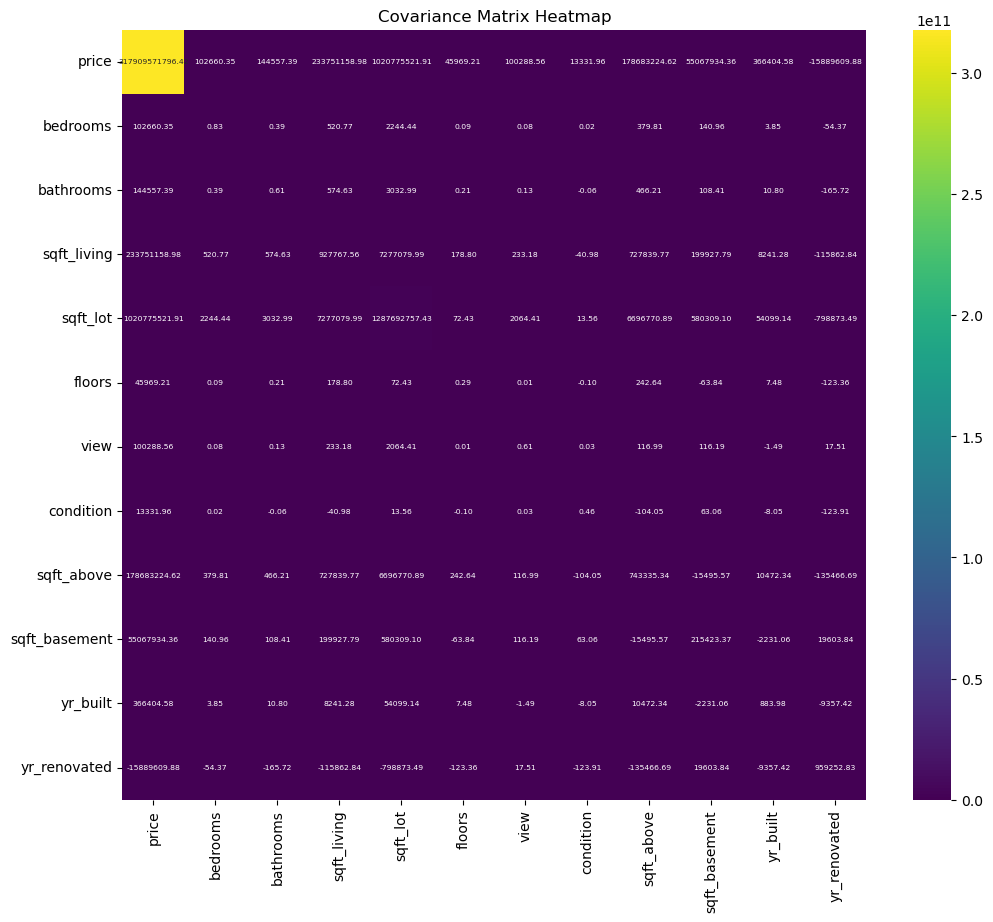

33

In [94]:
#Q13

plt.figure(figsize=(12, 10))
sns.heatmap(covariancematrix, cmap='viridis', fmt='.2f', annot=True, annot_kws={'size':5.5 })
plt.title('Covariance Matrix Heatmap')
plt.show()
33

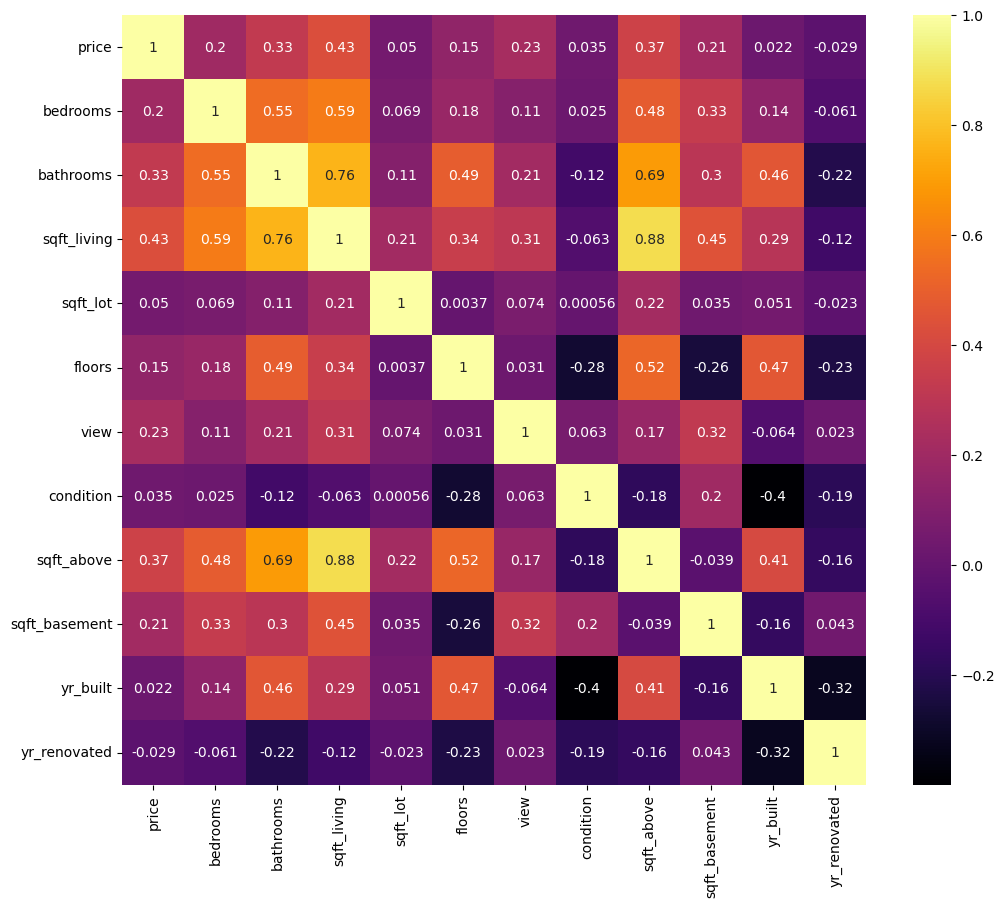

In [79]:
# Using Pearson Correlation
plt.figure(figsize=(12, 10))
correlation_matrix = dfnum.corr()
sns.heatmap(correlation_matrix,cmap='inferno', annot=True)
plt.show()


14. Compute the eigenvalue, eigenvector, and Rank of the covariance matrix.

In [ ]:
evalue,evector=nla.eig(covariancematrix)
print("Eigen value of covariance matrix is \n ",evalue)
print("Eigen vector of covariance matrix is \n ",evector)
print("Rank of the Covariance Matrix is \n", nla.matrix_rank(covariancematrix))

16. Calculate the inverse of the covariance matrix

In [ ]:
covinv=la.inv(covariancematrix)
covinv

18. How does the rank relate to multicollinearity among the independent variables? Provide
examples from the dataset.

In [ ]:
X=df[['bedrooms','sqft_lot','sqft_living','floors','waterfront','bathrooms','view','price','condition','sqft_above','sqft_basement','yr_built','yr_renovated']].to_numpy()

rankX = nla.matrix_rank(X)
print("Matrix X Rank:", rankX)
# Determine the feasibility based on rank
if rankX < X.shape[1]:
    print("Matrix X is rank-deficient. Multicollinearity needs to be addressed")
else:
    print("Matrix X has full column rank. Feasible for solving linear regression.")

19. Create a matrix X with the selected_features = ['bedrooms', 'sqft_lot', 'floors', 'yr_built']
and Y with the target feature and Print matrix X and Y

In [ ]:

#let us consider price as target for the given input features


selected_features = ['bedrooms', 'sqft_lot', 'floors', 'yr_built']
X = df[selected_features]
Y = df['price']
print("Matrix X is \n",X)
print("Y is \n",Y)

20. Compute the transpose of matrix X and print the transpose matrix.

In [ ]:
print("Transpose of X is \n",X.T)
#X.T

21. solve the linear system of equations 'X * a = Y,' where 'a' represents the coefficients

In [ ]:
a = nla.solve(X.T@X, X.T@Y)
print("Coeff of linear sys are", a)

22. Once you've obtained the coefficient 'a,' create a scatter plot that visually represents the
relationship between one of the selected features and the target variable 'price.' Include a
regression line on the plot to illustrate the linear relationship. Provide insights and
interpretations based on the scatter plot.

In [ ]:

bedrooms = df['bedrooms']
price = df['price']
sns.regplot(x=bedrooms, y=price, line_kws={"color": "red"})
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Scatter Plot of Bedrooms vs. Price')
plt.show()

lot = df['sqft_lot']
price = df['price']
sns.regplot(x=lot, y=price, line_kws={"color": "red"})
plt.xlabel('lot size')
plt.ylabel('Price')
plt.title('Scatter Plot of lotsize vs. Price')
plt.show()

floor = df['floors']
price = df['price']
sns.regplot(x=floor, y=price, line_kws={"color": "red"})
plt.xlabel('floor')
plt.ylabel('Price')
plt.title('Scatter Plot of floors vs. Price')
plt.show()

built = df['yr_built']
price = df['price']
sns.regplot(x=built, y=price, line_kws={"color": "red"})
plt.xlabel('year constructed')
plt.ylabel('Price')
plt.title('Scatter Plot of constructed year vs. Price')
plt.show()